In [1]:
import sys 
import numpy as np
import pandas as pd
sys.path.append("../") 
from src.datasets import Census, BaseIndex, Voters
from src.proxies import ftBisg

from sklearn.model_selection import train_test_split
races_o = ["white", "black", "hispanic", "api", "other"]




In [2]:
bisg = pd.read_csv("../data/voters/nc_bisg.csv")
bisg = bisg.rename(columns={
    "pred.whi": "white", 
    "pred.bla": "black",
    "pred.his": "hispanic",
    "pred.asi": "api", 
    "pred.oth": "other"
})

bifsg = pd.read_csv("../data/voters/nc_bifsg.csv")
bifsg = bifsg.rename(columns={
    "pred.whi": "white", 
    "pred.bla": "black",
    "pred.his": "hispanic",
    "pred.asi": "api", 
    "pred.oth": "other"
})

fbisg = pd.read_csv("../data/voters/nc_fbisg.csv")
fbisg = fbisg.rename(columns={
    "pred.whi": "white", 
    "pred.bla": "black",
    "pred.his": "hispanic",
    "pred.asi": "api", 
    "pred.oth": "other"
})

bisg.loc[:,"race"].replace({
    "hisp": "hispanic", 
    "asian": "api",
    "aian": "other"
}, inplace=True)

/var/folders/6j/97pkxkbn20zdxwjg13tprrb00000gq/T/ipykernel_8123/963542450.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bisg.loc[:,"race"].replace({


In [8]:
races = ["white", "black", "hispanic", "api"]
v = Voters(path="../data/voters/nc_2all.csv")

train_v, test_v = train_test_split(v.data, test_size=.50)

census = Census(api_key="../doc/api.txt", races=races)
ftbisg = ftBisg(races=races, census=census)

all_results = []
for party in ["dem", "rep", "ind"]:
    ftbisg.train(data=train_v, outcome=party, target="party", eta=0.00)

    masked_test = test_v[test_v["party"] == party]
    masked_test.loc[:,"race"] = masked_test.race.map(lambda x: x if x in races else "other")
    ftbisg_results = ftbisg.inference(data=masked_test)


    all_results.append(ftbisg_results)
ftbisg_df = pd.concat(all_results, axis=0)
ftbisg_df

/Users/kaggrey/Documents/research/proxies/experiments/../src/proxies.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  probs_new["other"] = probs.iloc[:,excl_indexes].sum(axis=1, min_count=1)


Beginning Training...


100%|██████████| 2655/2655 [00:11<00:00, 239.46it/s] 
/Users/kaggrey/Documents/research/proxies/experiments/../src/proxies.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  probs_new["other"] = probs.iloc[:,excl_indexes].sum(axis=1, min_count=1)


Beginning Training...


100%|██████████| 2655/2655 [00:12<00:00, 215.01it/s] 
/Users/kaggrey/Documents/research/proxies/experiments/../src/proxies.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  probs_new["other"] = probs.iloc[:,excl_indexes].sum(axis=1, min_count=1)


Beginning Training...


100%|██████████| 2655/2655 [00:11<00:00, 239.91it/s] 


,last,first,party,lic,n_voted,voted_2014_11,voted_2015_11,voted_2016_11,voted_2017_11,voted_2018_11,...,CD,geoid,dem,rep,ind,white,black,hispanic,api,other
50182,NOLEN,CHANEL,dem,True,1.0,False,False,False,False,True,...,37,37001020302,True,False,False,0.287292,0.612698,0.046769,1.420561e-03,0.051820
53653,PHILLIPS,ANDREA,dem,False,0.0,False,False,False,False,False,...,37,37001020702,True,False,False,0.319401,0.620533,0.009948,7.836345e-04,0.049335
179757,CALDWELL,MARY,dem,True,0.0,False,False,False,False,False,...,37,37019020518,True,False,False,0.498139,0.499231,0.002628,1.596536e-08,0.000002
195215,GRAHAM,CAIN,dem,False,2.0,False,False,True,False,True,...,37,37017950602,True,False,False,0.120479,0.777461,0.000819,1.054251e-05,0.101231
80097,BROWN,RACHEL,dem,False,4.0,True,False,True,False,True,...,37,37007920200,True,False,False,0.288493,0.688876,0.001004,4.159477e-04,0.021211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176498,WHITSON,STEVEN,ind,True,5.0,True,True,True,False,True,...,37,37013930501,False,False,True,0.917195,0.051173,0.005112,1.985730e-08,0.026520
67234,TAYLOR,AMBER,ind,False,2.0,False,False,True,False,False,...,37,37001021802,False,False,True,0.915063,0.035270,0.002724,3.784983e-04,0.046564
151018,BENSON,MAREE,ind,True,7.0,False,False,True,True,True,...,37,37017950102,False,False,True,0.916287,0.049744,0.005514,2.608780e-08,0.028454
3675,BARKER,MARQUITA,ind,True,3.0,False,False,True,False,True,...,37,37001021600,False,False,True,0.902100,0.052008,0.006462,8.527818e-04,0.038577


In [32]:
import seaborn as sns 
def weighted_estimator(df, outcome, outcome_value):
    weighted = df.loc[:,races_o].mul(df[outcome] == outcome_value, axis=0).sum()
    return weighted/df.loc[:,races_o].sum()


def bayes_estimator(df, outcome, outcome_value):

    filter = df[df[outcome] == outcome_value]

    filter_mean = filter.loc[:,races_o].mean() 


    acceptance_rate = (df[outcome] == outcome_value).mean() 

    avg_race = df.loc[:,races_o].mean() 


    return (filter_mean * acceptance_rate)/avg_race




rows_ = [] 
real_proportions = bisg.groupby("race").party.value_counts(normalize=True)
for race, party in real_proportions.index:
    rows_.append({
                "method": "True",
                "race" : race,
                "Proportion": real_proportions[(race,party)],
                "party": party
    })

methods = {"cBISG": ftbisg_df, "BISG": bisg, "BIFSG": bifsg, "fBISG": fbisg}
for name, method in methods.items():
    for party in ["dem", "rep", "ind"]:
        weighted_estimate = weighted_estimator(method, outcome="party", outcome_value=party)
        # bayes_estimate = bayes_estimate(method, outcome="party", outcome_value=party)
        for i, x in enumerate(weighted_estimate):
            rows_.append({
                "method": name,
                "race" : weighted_estimate.index[i], 
                "Proportion": x,
                "party": party
            })

rows = pd.DataFrame(rows_)


/var/folders/6j/97pkxkbn20zdxwjg13tprrb00000gq/T/ipykernel_28833/964365147.py:6: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.stripplot(data= df_party,
/var/folders/6j/97pkxkbn20zdxwjg13tprrb00000gq/T/ipykernel_28833/964365147.py:6: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.stripplot(data= df_party,
/var/folders/6j/97pkxkbn20zdxwjg13tprrb00000gq/T/ipykernel_28833/964365147.py:6: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.stripplot(data= df_party,


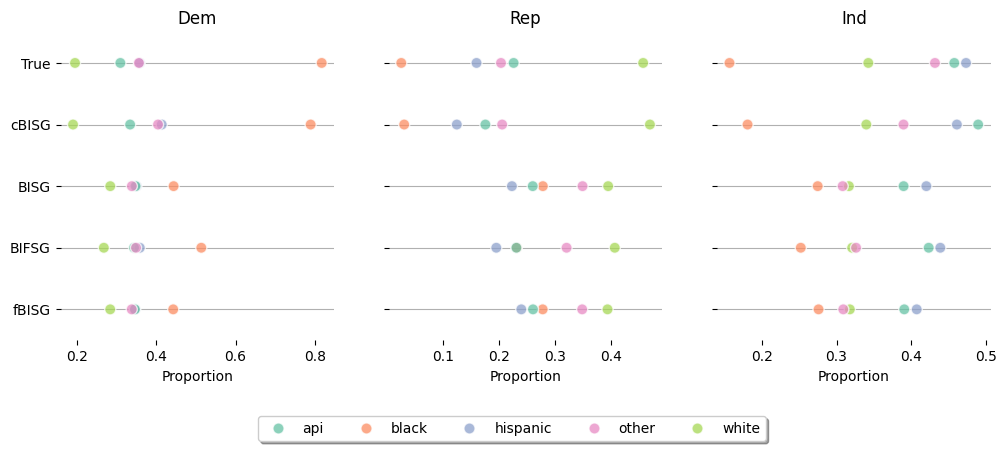

In [33]:
import matplotlib.pyplot as plt 
fig, axs = plt.subplots(1,3, figsize=(12,4))

for i, party in enumerate(["dem", "rep", "ind"]):
    df_party = rows[rows["party"] == party]
    sns.stripplot(data= df_party, 
                  x="Proportion", 
                  y="method", 
                  hue="race", 
                  ax = axs[i], 
                  palette=sns.color_palette("Set2"), 
                  size=8, 
                  jitter=False, 
                  alpha=0.75,
                  linewidth=1, 
                  edgecolor="w")
    axs[i].set_ylabel("")
    axs[i].xaxis.grid(False)
    axs[i].yaxis.grid(True)
    # axs[i].xaxis.set_major_locator(plt.MaxNLocator(4))
    # for n, label in enumerate(axs[i].xaxis.get_ticklabels()):
    #     label.set_visible(True)

    # ymin, ymax = axs[i].get_ylim()
    # axs[i].set_yticks(np.linspace(ymin, ymax, 4))

    party = party[0].upper() + party[1:]
    axs[i].set_title(party)
    if i != 0:
        axs[i].set_yticklabels([])
    if i == 2:
        plt.legend(loc="lower center", ncol=len(races_o), fancybox=True, shadow=True, bbox_to_anchor=(-.75, -.35))
    else:
        axs[i].get_legend().remove()

sns.despine(left=True, bottom=True)
plt.show()
